# Import Library

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt

# Data Overview

In [6]:
df = pd.read_csv('Telco_MonthlyPurchase_HighSegment.csv')

In [7]:
df.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
1,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
2,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
3,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0
4,8,47,Jakarta,High End,No,Yes,No,No,Yes,Yes,Pulsa,129.155,Yes,106.816666,-6.2,7525.7


In [8]:
df.shape

(3769, 16)

In [9]:
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,Customer ID,int64,0,0.0,3769,"[1, 2, 3, 4]"
1,Tenure Months,int64,0,0.0,73,"[2, 8, 28, 49]"
2,Location,object,0,0.0,2,"[Jakarta, Bandung]"
3,Device Class,object,0,0.0,2,"[High End, Mid End]"
4,Games Product,object,0,0.0,2,"[No, Yes]"
5,Music Product,object,0,0.0,2,"[No, Yes]"
6,Education Product,object,0,0.0,2,"[No, Yes]"
7,Call Center,object,0,0.0,2,"[No, Yes]"
8,Video Product,object,0,0.0,2,"[No, Yes]"
9,Use MyApp,object,0,0.0,2,"[No, Yes]"


In [10]:
df['Tenure Months'].value_counts()

72    255
1     238
2     112
71    112
3      97
     ... 
28     28
36     27
44     25
39     23
0       2
Name: Tenure Months, Length: 73, dtype: int64

The minority class (churned) covers 26% proportion of the dataset, this indicate the mildly imbalanced dataset.

In [11]:
df['Churn Label'].value_counts(normalize=True)*100

No     64.446803
Yes    35.553197
Name: Churn Label, dtype: float64

# Data Cleaning

### Null

In [12]:
df.isnull().sum()

Customer ID                     0
Tenure Months                   0
Location                        0
Device Class                    0
Games Product                   0
Music Product                   0
Education Product               0
Call Center                     0
Video Product                   0
Use MyApp                       0
Payment Method                  0
Monthly Purchase (Thou. IDR)    0
Churn Label                     0
Longitude                       0
Latitude                        0
CLTV (Predicted Thou. IDR)      0
dtype: int64

### Duplicate

In [13]:
df.duplicated().sum()

0

### Outliers

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
numerical_cols = df.select_dtypes(exclude='object').columns
# exclude ID, Longitude, Latitude
numerical_cols = list(set(numerical_cols)-(set(['Customer ID', 'Longitude', 'Latitude'])))
numerical_cols

['CLTV (Predicted Thou. IDR)', 'Monthly Purchase (Thou. IDR)', 'Tenure Months']

### Double Axis

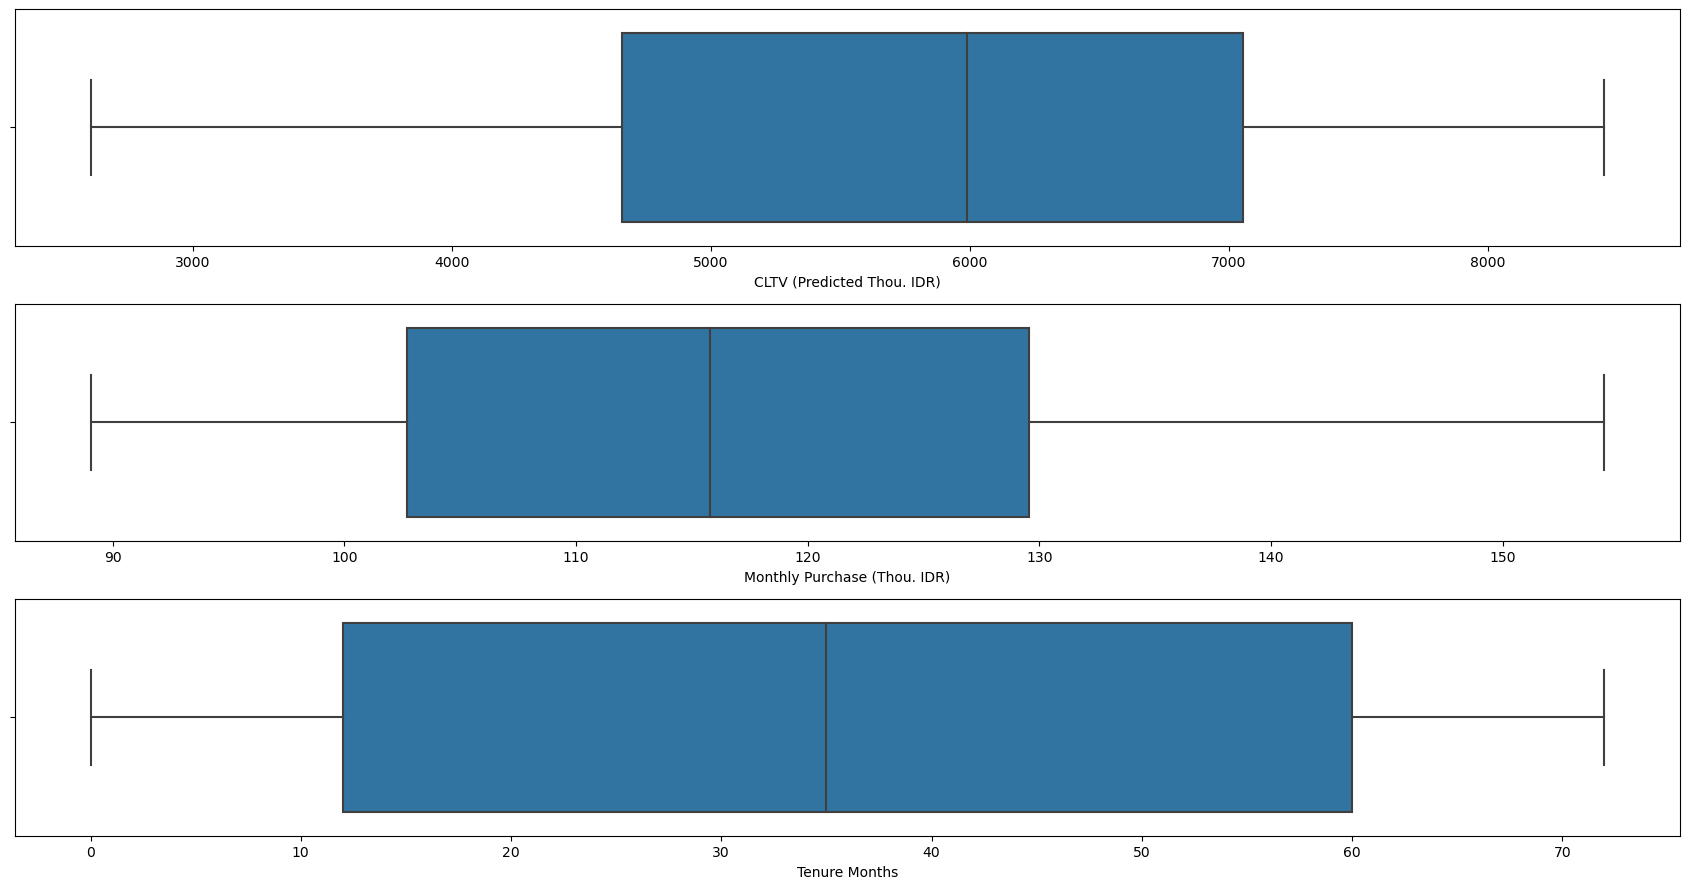

In [16]:
fig, axes = plt.subplots(3, 1, figsize=(17, 9))

for i in range(len(numerical_cols)):
    sns.boxplot(x=df[numerical_cols[i]], ax=axes[i])
    plt.tight_layout()

### Scale Value

In [17]:
df_scaled = df.copy()
scaler = MinMaxScaler()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

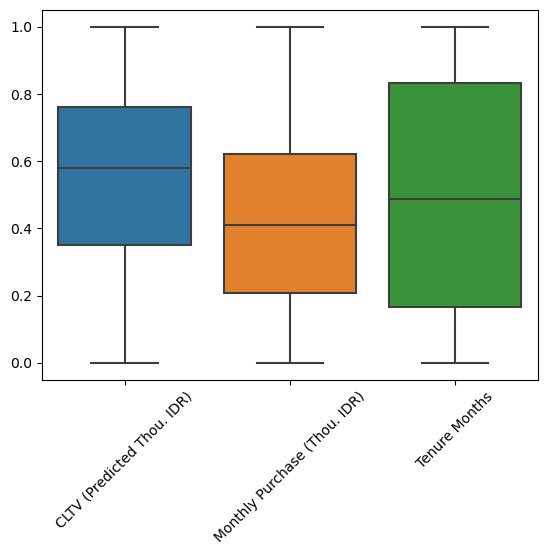

In [18]:
sns.boxplot(df_scaled[numerical_cols], showfliers=True)

# Rotate x-axis labels diagonally
plt.xticks(rotation=45)

# Show the plot
plt.show()

# EDA

## Descriptive Statistics

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,3769.0,3185.348634,2098.037240,1.000000,1301.000000,2960.000000,5033.00000,7042.00000
Tenure Months,3769.0,35.979040,24.754867,0.000000,12.000000,35.000000,60.00000,72.00000
Monthly Purchase (Thou. IDR),3769.0,115.967416,16.652134,89.050000,102.700000,115.765000,129.54500,154.37500
Longitude,3769.0,107.040783,0.357159,106.816666,106.816666,106.816666,107.60981,107.60981
Latitude,3769.0,-6.401964,0.321855,-6.914744,-6.914744,-6.200000,-6.20000,-6.20000
CLTV (Predicted Thou. IDR),3769.0,5809.381985,1533.002766,2603.900000,4657.900000,5987.800000,7053.80000,8450.00000


In [20]:
72/12

6.0

In [21]:
df.describe(exclude=[np.number]).T

,count,unique,top,freq
Location,3769,2,Jakarta,2704
Device Class,3769,2,High End,3094
Games Product,3769,2,No,2460
Music Product,3769,2,No,1981
Education Product,3769,2,No,1910
Call Center,3769,2,No,2372
Video Product,3769,2,Yes,2288
Use MyApp,3769,2,Yes,2290
Payment Method,3769,4,Pulsa,1706
Churn Label,3769,2,No,2429


## Univariate Analysis

### Distribution

#### Numerical Features

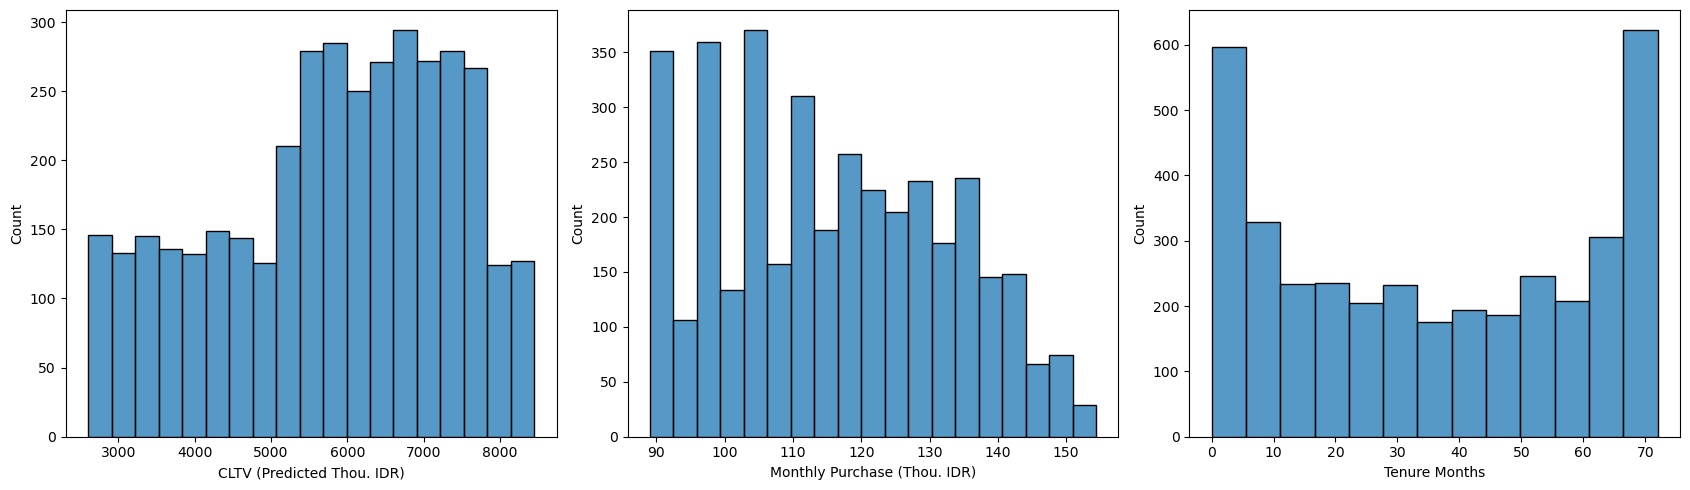

In [22]:
# Create Distplot for Each Numerical Feature
plt.figure(figsize=(17,5))
for i in range(0, len(numerical_cols)):
    plt.subplot(1, 3, i+1)
    sns.histplot(x=df[numerical_cols[i]])
    plt.xlabel(numerical_cols[i])
    plt.tight_layout()
plt.show()

#### Categorical Features

In [23]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['Location', 'Device Class', 'Games Product', 'Music Product',
       'Education Product', 'Call Center', 'Video Product', 'Use MyApp',
       'Payment Method', 'Churn Label'],
      dtype='object')

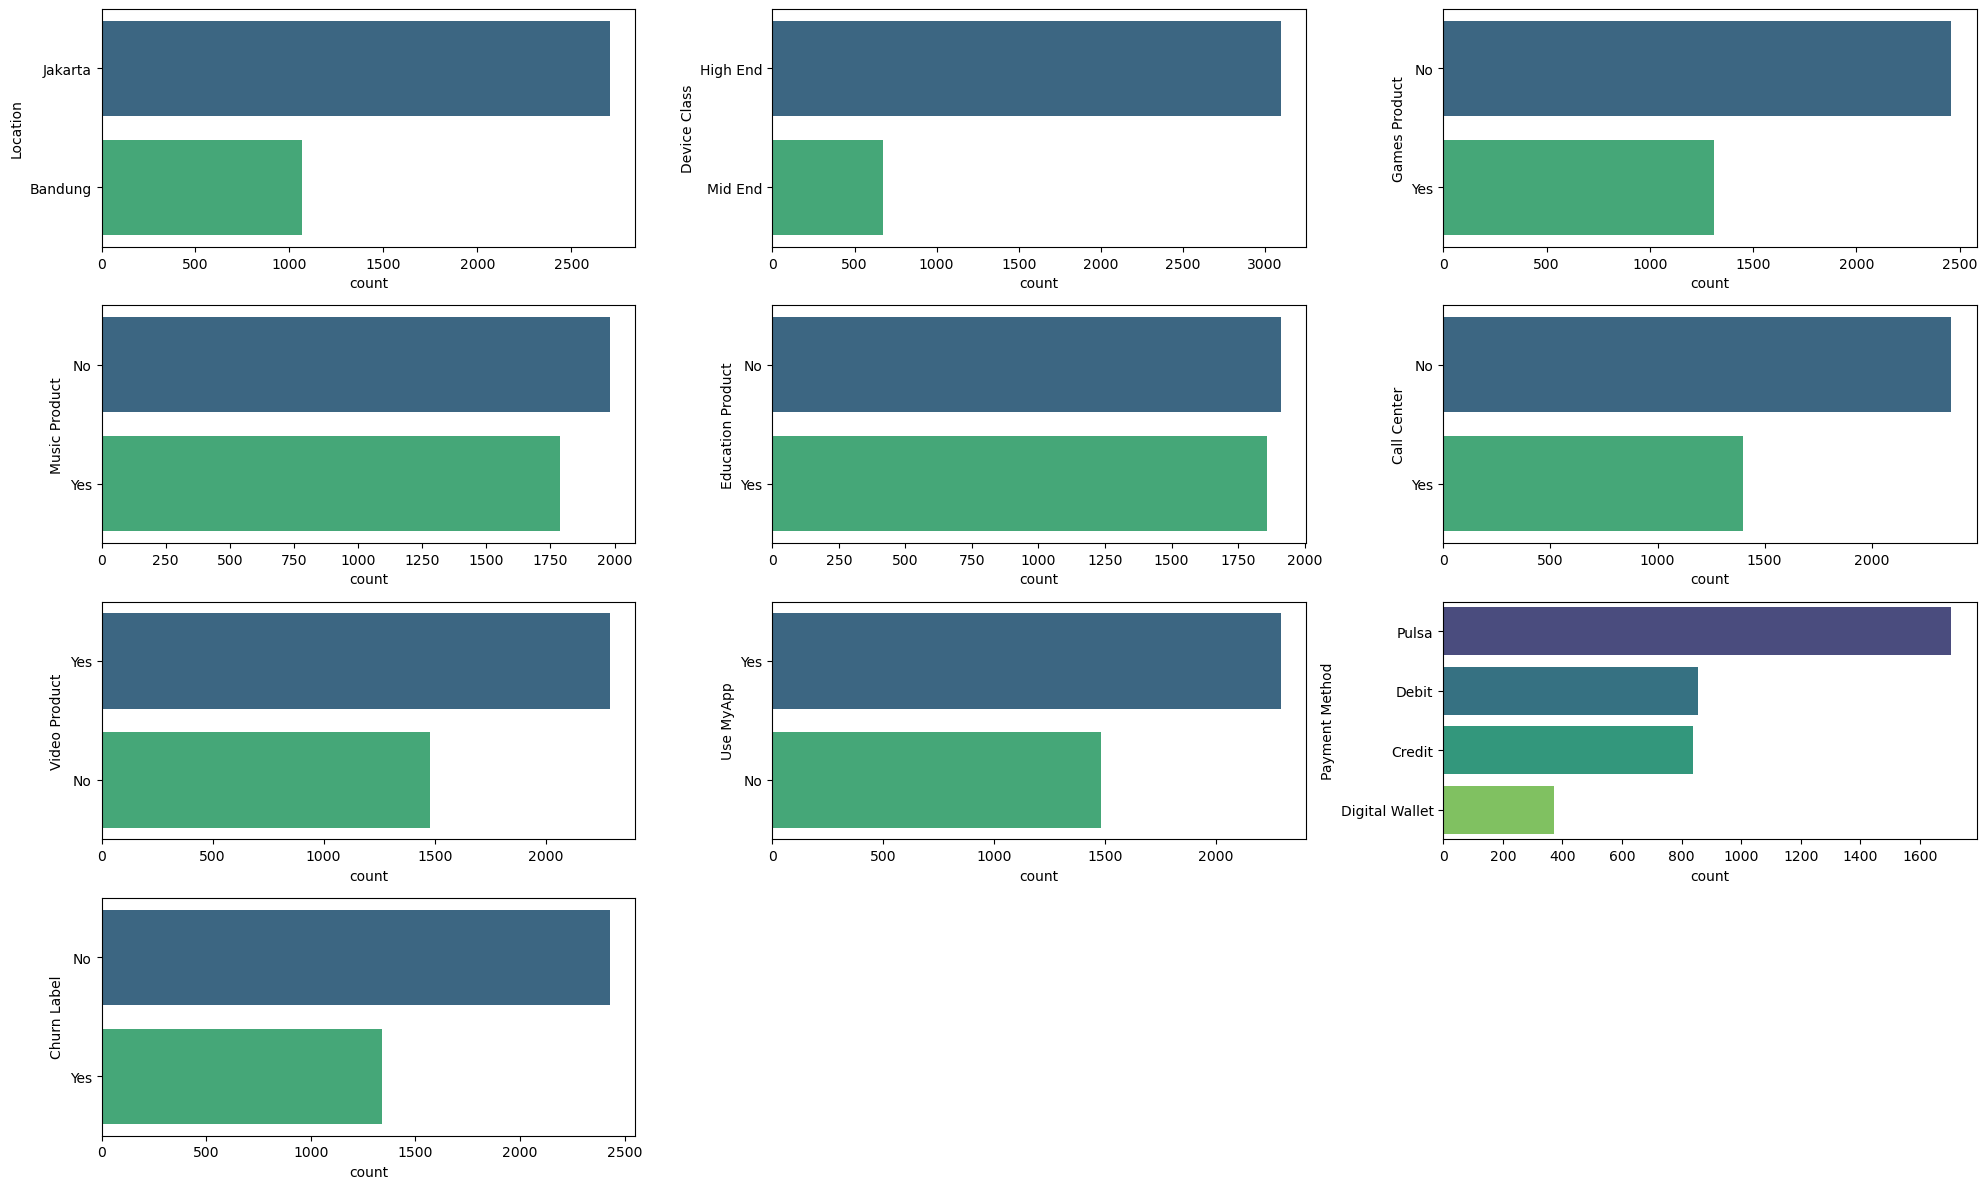

In [24]:
# Create Countplot for Each Categorical Feature
fig, axes = plt.subplots(4, 3, figsize=(20,12))
xy = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2), (3,0), (3,1), (3,2), (4,0)]

for i in range(len(cat_cols)):
    if i == 0:
        sns.countplot(y=df[cat_cols[i]], palette='viridis',ax=axes[xy[i]])
    else:
        sns.countplot(y=df[cat_cols[i]], palette='viridis', order= df[cat_cols[i]].value_counts().index, ax=axes[xy[i]])
axes[3, 1].axis('off')
axes[3, 2].axis('off')
plt.tight_layout()

## Bivariate Analysis

#### Numerical Feature

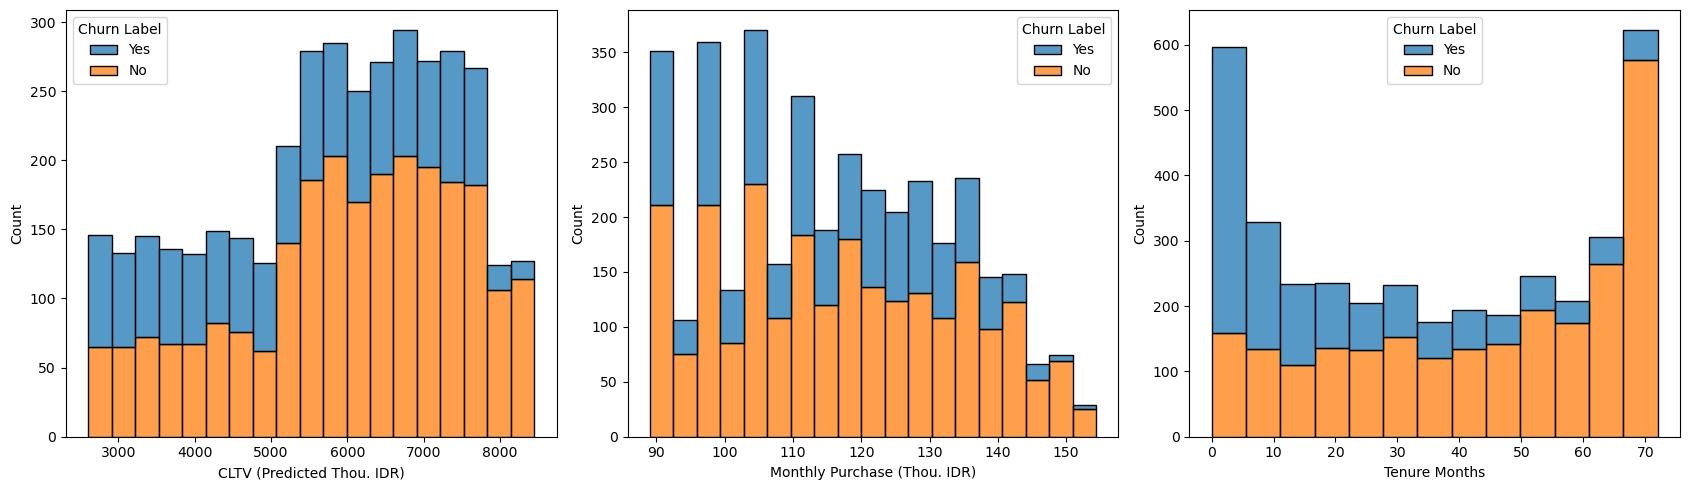

In [25]:
# x_text_coor = [5800, 100, 35]
# y_text_coor = [450, 800, 800]
# Create Distplot for Each Numerical Feature
plt.figure(figsize=(17,5))
for i in range(0, len(numerical_cols)):
    plt.subplot(1, 3, i+1)
    sns.histplot(x=df[numerical_cols[i]], hue=df['Churn Label'], multiple='stack')
    plt.xlabel(numerical_cols[i])
    
    mean=round(df[numerical_cols[i]].mean(), 1)
    #plt.axvline(mean, color='red', linestyle='--') 
    #plt.text(x_text_coor[i], y_text_coor[i], f'mean={mean}', color='red', ha='left', va='top')
    plt.tight_layout()

#### Categorical Features

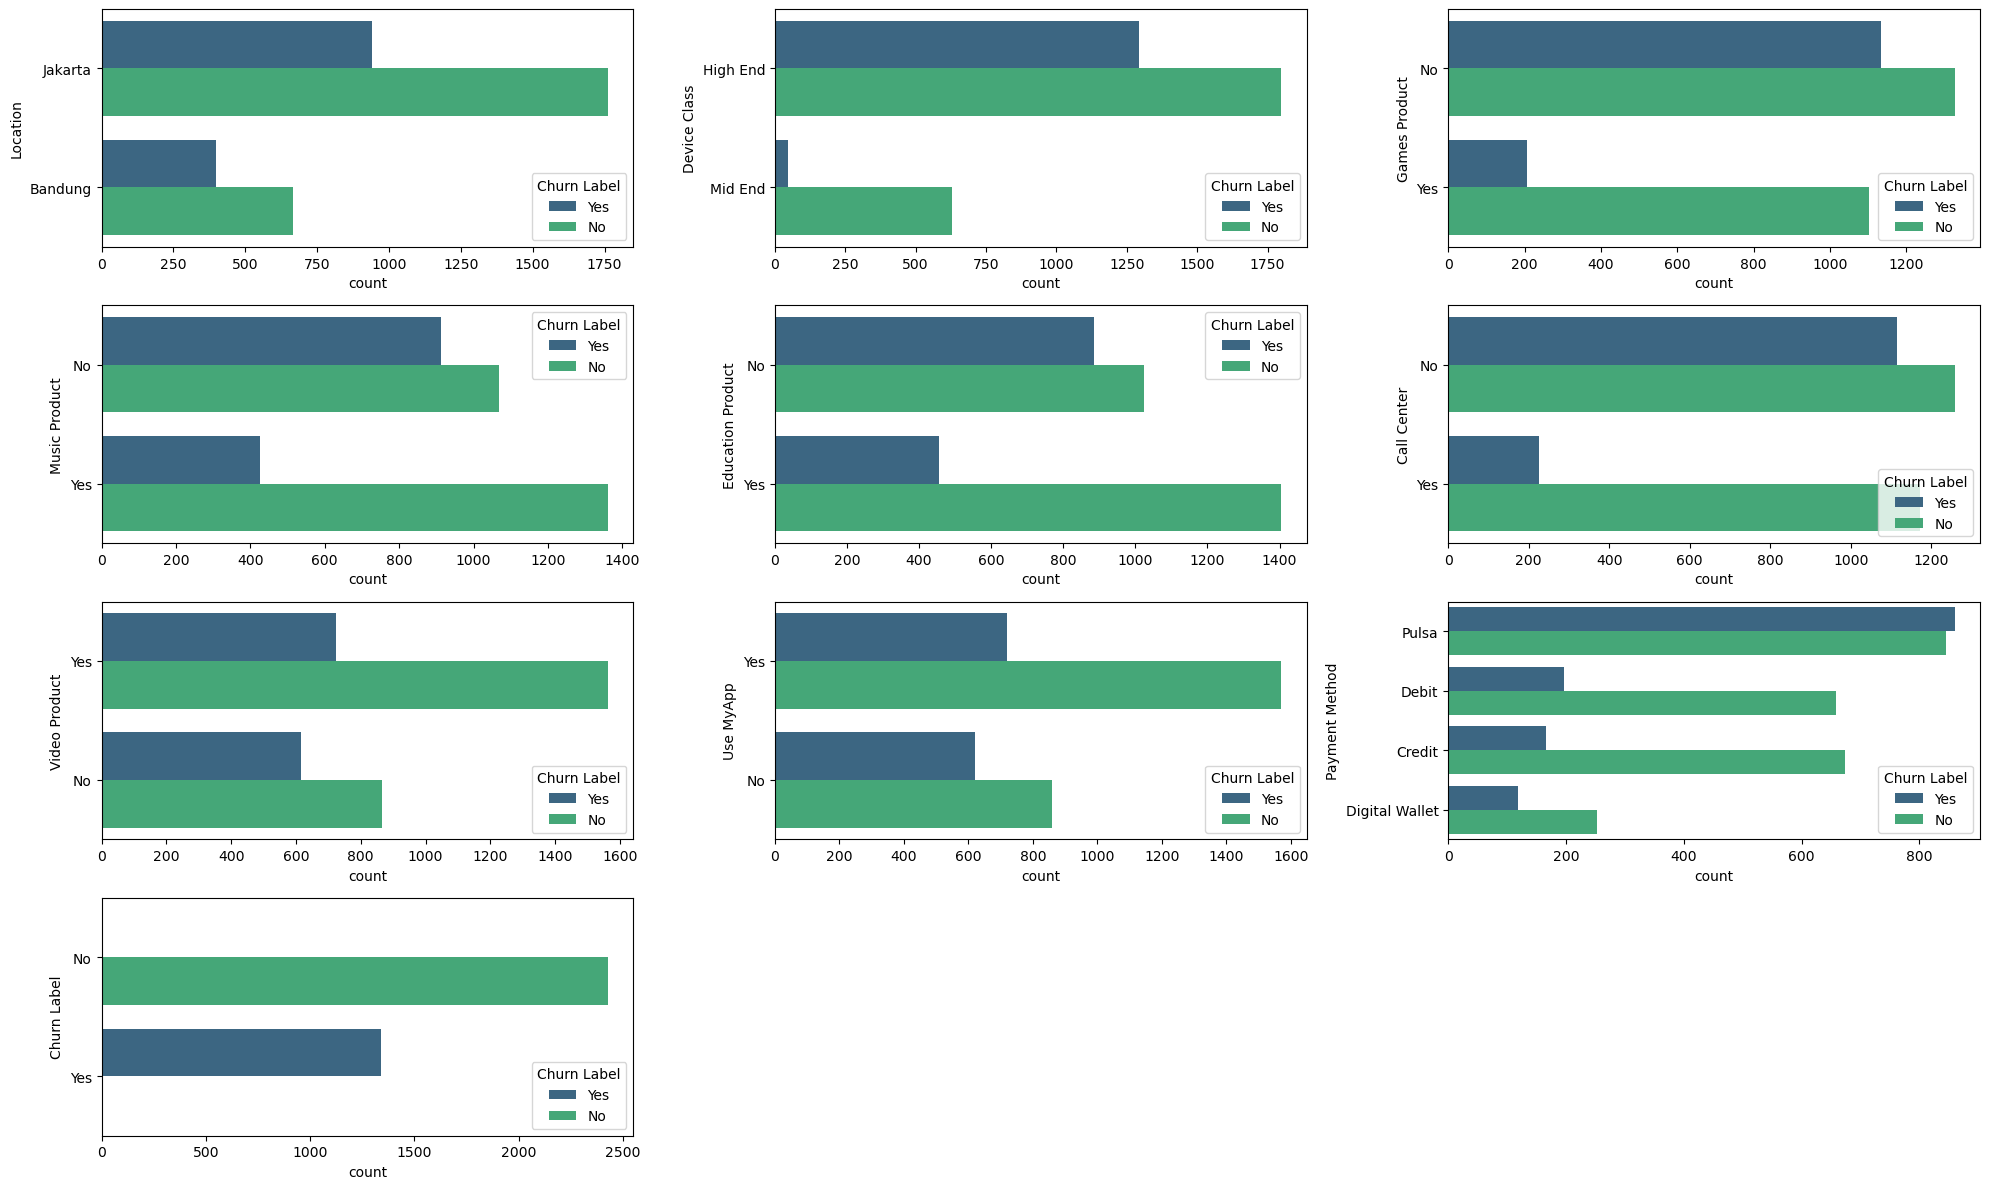

In [26]:
# Create Countplot for Each Categorical Feature
fig, axes = plt.subplots(4, 3, figsize=(20,12))
xy = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2), (3,0), (3,1), (3,2), (4,0)]

for i in range(len(cat_cols)):
    if i == 0:
        sns.countplot(y=df[cat_cols[i]], palette='viridis',ax=axes[xy[i]], hue=df['Churn Label'])
    else:
        sns.countplot(y=df[cat_cols[i]], palette='viridis', order= df[cat_cols[i]].value_counts().index, ax=axes[xy[i]], hue=df['Churn Label'])
axes[3, 1].axis('off')
axes[3, 2].axis('off')
plt.tight_layout()

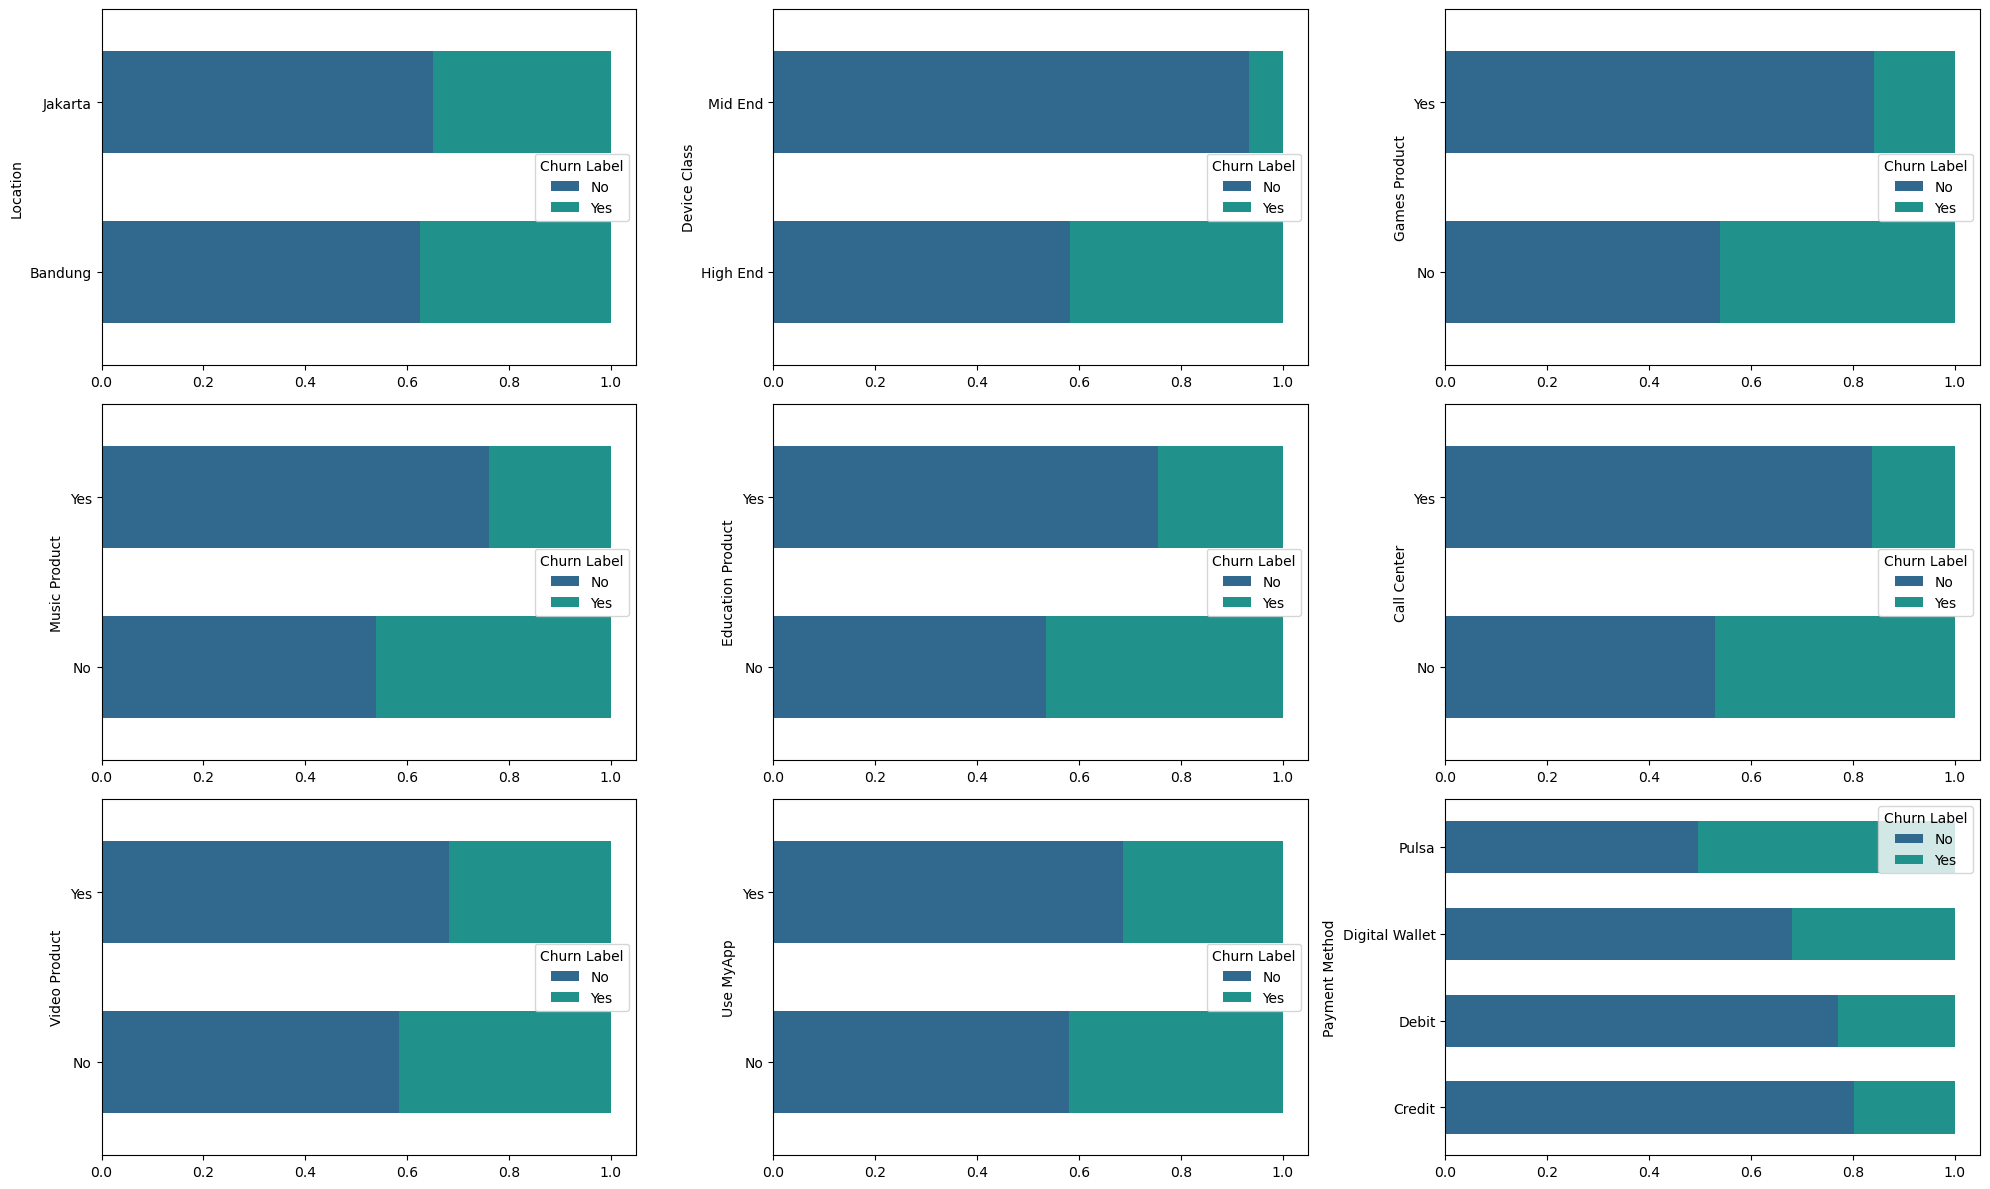

In [27]:
# Create 100% Stacked Bar Chart per Purchase for Each Categorical Feature
fig, ax = plt.subplots(3, 3, figsize=(20,12))
xy = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2), (3,0), (3,1), (3,2), (4,0)]

for i in range(len(cat_cols)-1):
    sbc = pd.crosstab(df[cat_cols[i]], df['Churn Label'])
    sbc = sbc.div(sbc.sum(axis=1).astype(float), axis=0)
    sbc.plot(kind='barh', stacked=True, color = ['#31688e', '#21918c'], width = 0.6, ax = ax[xy[i]])
    #ax[xy[i]].legend().remove()

plt.tight_layout()
# not_churn = mlp.patches.Patch(color='#31688e', label='Not Churn')
# churn = mlp.patches.Patch(color='#21918c', label='Churn')
# plt.legend(handles=[not_churn, churn], fontsize=14)

## Multivariate Analysis

#### Correlation Heatmap

<AxesSubplot:>

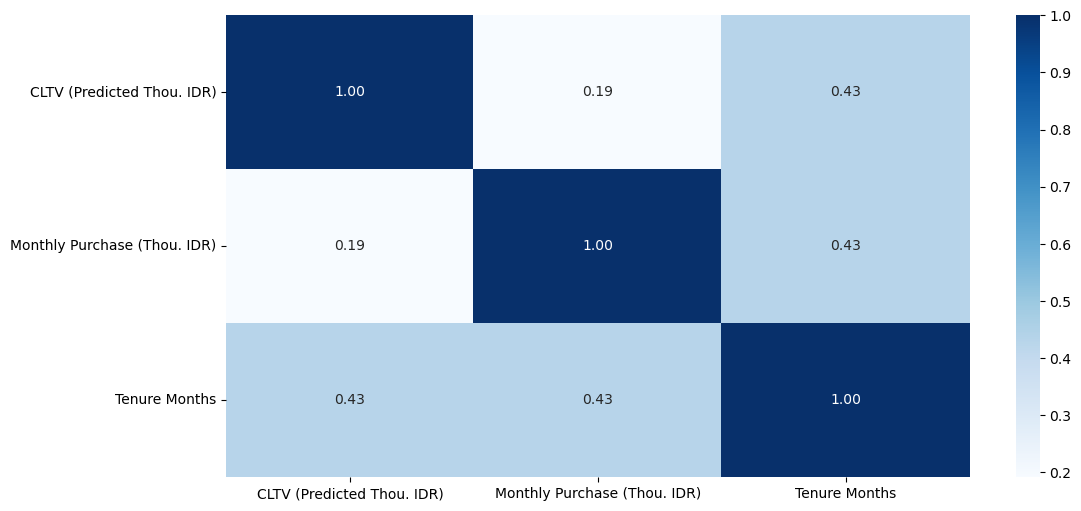

In [28]:
# Create Heatmap Correlation Chart for Each Numerical Features

plt.figure(figsize=(12, 6))
sns.heatmap(df[numerical_cols].corr(), cmap='Blues', annot=True, fmt='.2f')

#### Correlation Heatmap with Target Features

<AxesSubplot:>

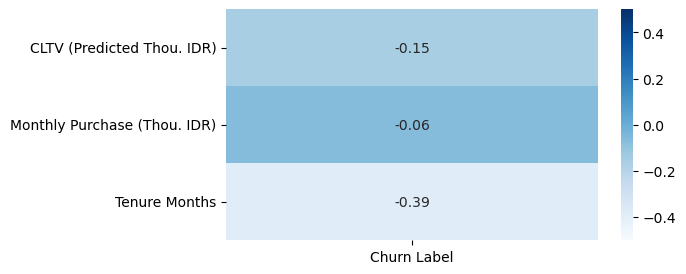

In [29]:
label_num = df['Churn Label'].replace({'Yes': 1, 'No': 0})
data = pd.concat([df[numerical_cols], label_num], axis=1)

plt.figure(figsize=(6, 3))
(sns.heatmap(data.corr(method = 'kendall')
            [data.corr(method='kendall')
             .index != 'Churn Label'][['Churn Label']], 
            annot=True,
           cmap='Blues',
            fmt='.2f',
            vmin=-0.5,
            vmax=0.5))

#### Pair Plot

<Figure size 1500x1500 with 0 Axes>

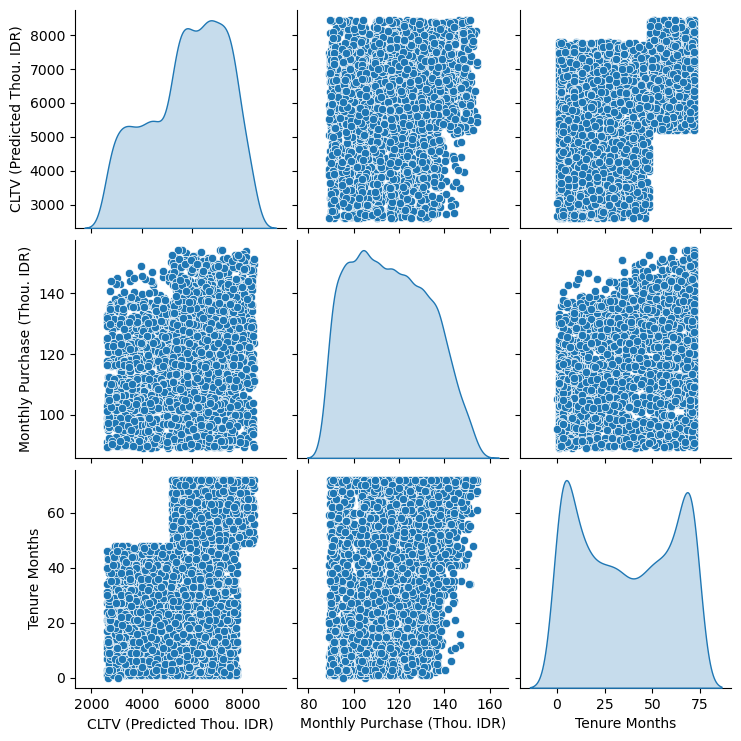

In [30]:
# create pairplot
plt.figure(figsize=(15, 15))
sns.pairplot(df[numerical_cols], diag_kind='kde')

## Hypothesis Testing

In [31]:
from scipy.stats import chi2_contingency

#### Chi Square Test for Independence of `Device Class` and `Churn Label`

**Hypotheses:**

$H_0$: There is no significant relationship between the `Device Class` and `Churn Label` variables. In other words, the variables are independent.

$H_A$: There is a significant relationship between the `Device Class` and `Churn Label` variables. In other words, the variables are not independent.

In [32]:
# Create a frequency table
observed_data = pd.crosstab(df['Device Class'], df['Churn Label'])
observed_data

Churn Label,No,Yes
Device Class,,
High End,1799,1295
Mid End,630,45


In [33]:
_, p_value, _, expected_freq = chi2_contingency(observed_data)
if p_value < 0.05:
    print(f'The p_value {p_value} < 0.05 Accept the H0')
else:
    print(f'The p_value {p_value} >= 0.05 Reject the H0')
print('Expected Frequency:')
print(expected_freq)

The p_value 9.383441678399625e-67 < 0.05 Accept the H0
Expected Frequency:
[[1993.98408066 1100.01591934]
 [ 435.01591934  239.98408066]]


This means that the type of device a user uses `Device Class` does not have a significant influence on whether or not they churn `Churn Label`. In simpler terms, it implies that the choice of device (e.g., High End, Mid End, Low End) doesn't play a significant role in determining if a user will churn or not.

#### Chi Square Test for Independence of `Gaming Product` and `Churn Label`

**Hypotheses:**

$H_0$: There is no significant relationship between the `Games Product` and `Churn Label` variables. In other words, the variables are independent.

$H_A$: There is a significant relationship between the `Games Product` and `Churn Label` variables. In other words, the variables are not independent.

In [34]:
# Create a frequency table
observed_data = pd.crosstab(df['Games Product'], df['Churn Label'])
observed_data

Churn Label,No,Yes
Games Product,,
No,1327,1133
Yes,1102,207


In [35]:
_, p_value, _, expected_freq = chi2_contingency(observed_data)
if p_value < 0.05:
    print(f'The p_value {p_value} < 0.05 Accept the H0')
else:
    print(f'The p_value {p_value} >= 0.05 Reject the H0')
print('Expected Frequency:')
print(expected_freq)

The p_value 7.274413510059422e-76 < 0.05 Accept the H0
Expected Frequency:
[[1585.39135049  874.60864951]
 [ 843.60864951  465.39135049]]


#### Chi Square Test for Independence of `Call Center` and `Churn Label`

**Hypotheses:**

$H_0$: There is no significant relationship between the `Call Center` and `Churn Label` variables. In other words, the variables are independent.

$H_A$: There is a significant relationship between the `Call Center` and `Churn Label` variables. In other words, the variables are not independent.

In [36]:
# Create a frequency table
observed_data = pd.crosstab(df['Call Center'], df['Churn Label'])
observed_data

Churn Label,No,Yes
Call Center,,
No,1258,1114
Yes,1171,226


In [37]:
_, p_value, _, expected_freq = chi2_contingency(observed_data)
if p_value < 0.05:
    print(f'The p_value {p_value} < 0.05 Accept the H0')
else:
    print(f'The p_value {p_value} >= 0.05 Reject the H0')
print('Expected Frequency:')
print(expected_freq)

The p_value 8.641087472006044e-81 < 0.05 Accept the H0
Expected Frequency:
[[1528.67816397  843.32183603]
 [ 900.32183603  496.67816397]]


#### Chi Square Test for Independence of `Payment Method` and `Churn Label`

**Hypotheses:**

$H_0$: There is no significant relationship between the `Payment Method` and `Churn Label` variables. In other words, the variables are independent.

$H_A$: There is a significant relationship between the `Payment Method` and `Churn Label` variables. In other words, the variables are not independent.

In [38]:
# Create a frequency table
observed_data = pd.crosstab(df['Payment Method'], df['Churn Label'])
observed_data

Churn Label,No,Yes
Payment Method,,
Credit,673,166
Debit,658,196
Digital Wallet,252,118
Pulsa,846,860


In [39]:
_, p_value, _, expected_freq = chi2_contingency(observed_data)
if p_value < 0.05:
    print(f'The p_value {p_value} < 0.05 Accept the H0')
else:
    print(f'The p_value {p_value} >= 0.05 Reject the H0')
print('Expected Frequency:')
print(expected_freq)

The p_value 2.360775582341654e-68 < 0.05 Accept the H0
Expected Frequency:
[[ 540.70867604  298.29132396]
 [ 550.37569647  303.62430353]
 [ 238.4531706   131.5468294 ]
 [1099.46245689  606.53754311]]
